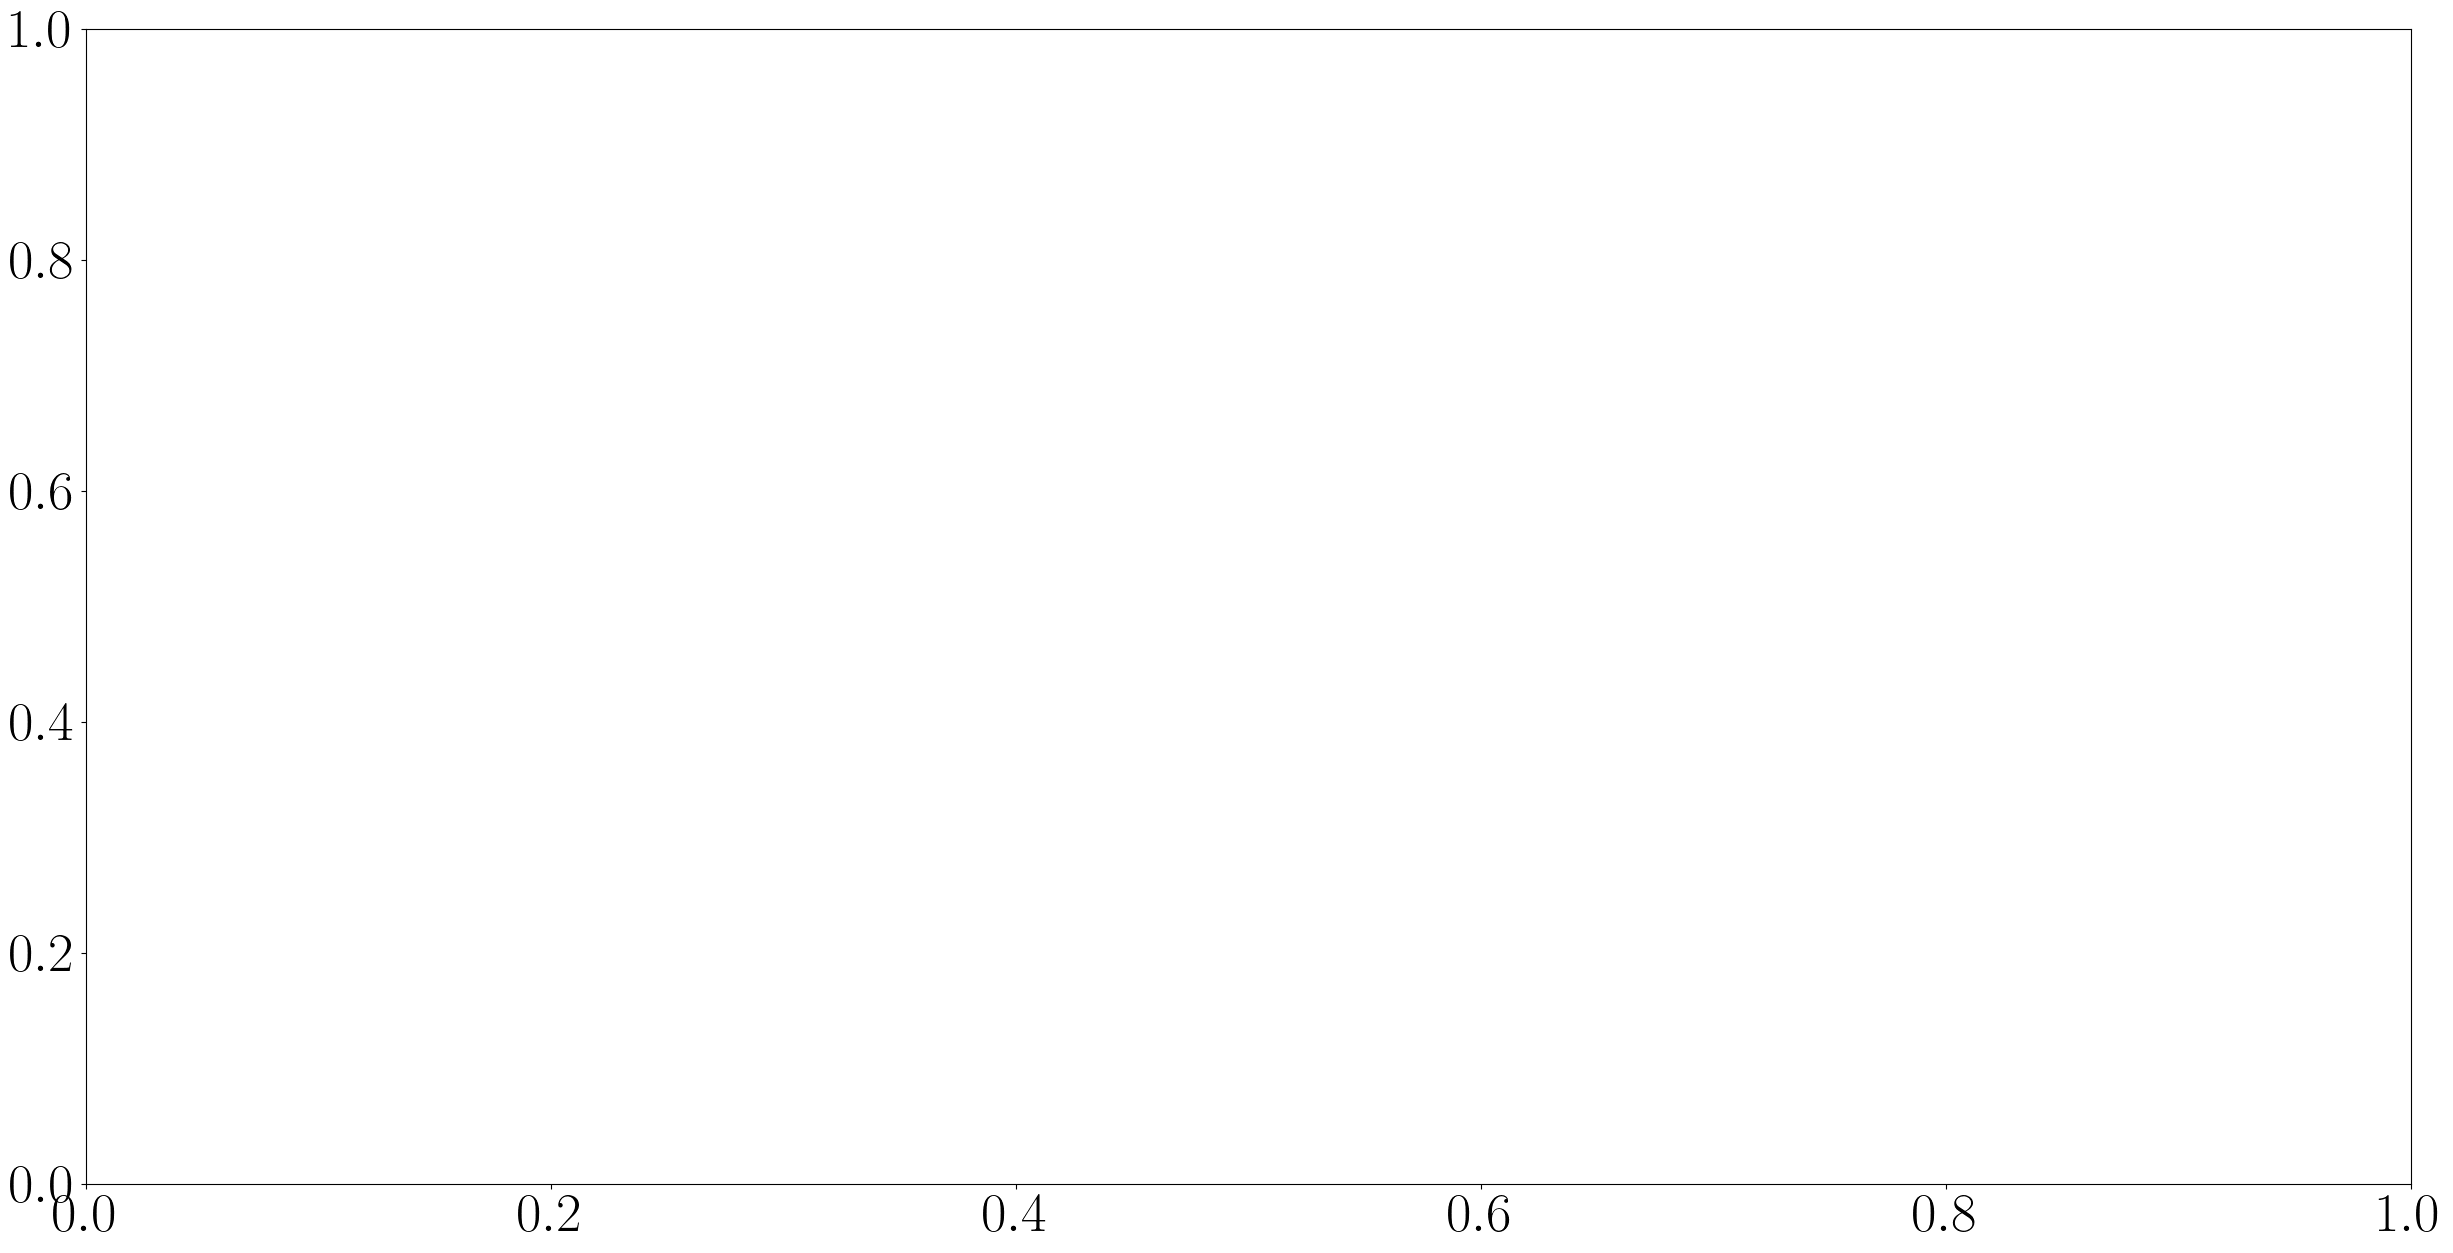

In [1]:
from Binaries import *


Classifier                                    Dataset                                  TP      FP      TN      FN
ENSEMBLES/120_TwoLayer_Downsampled_AllEn...   validation_data                       49972       0       0     100 -> ACC =  99.80%


/cr/users/filip/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


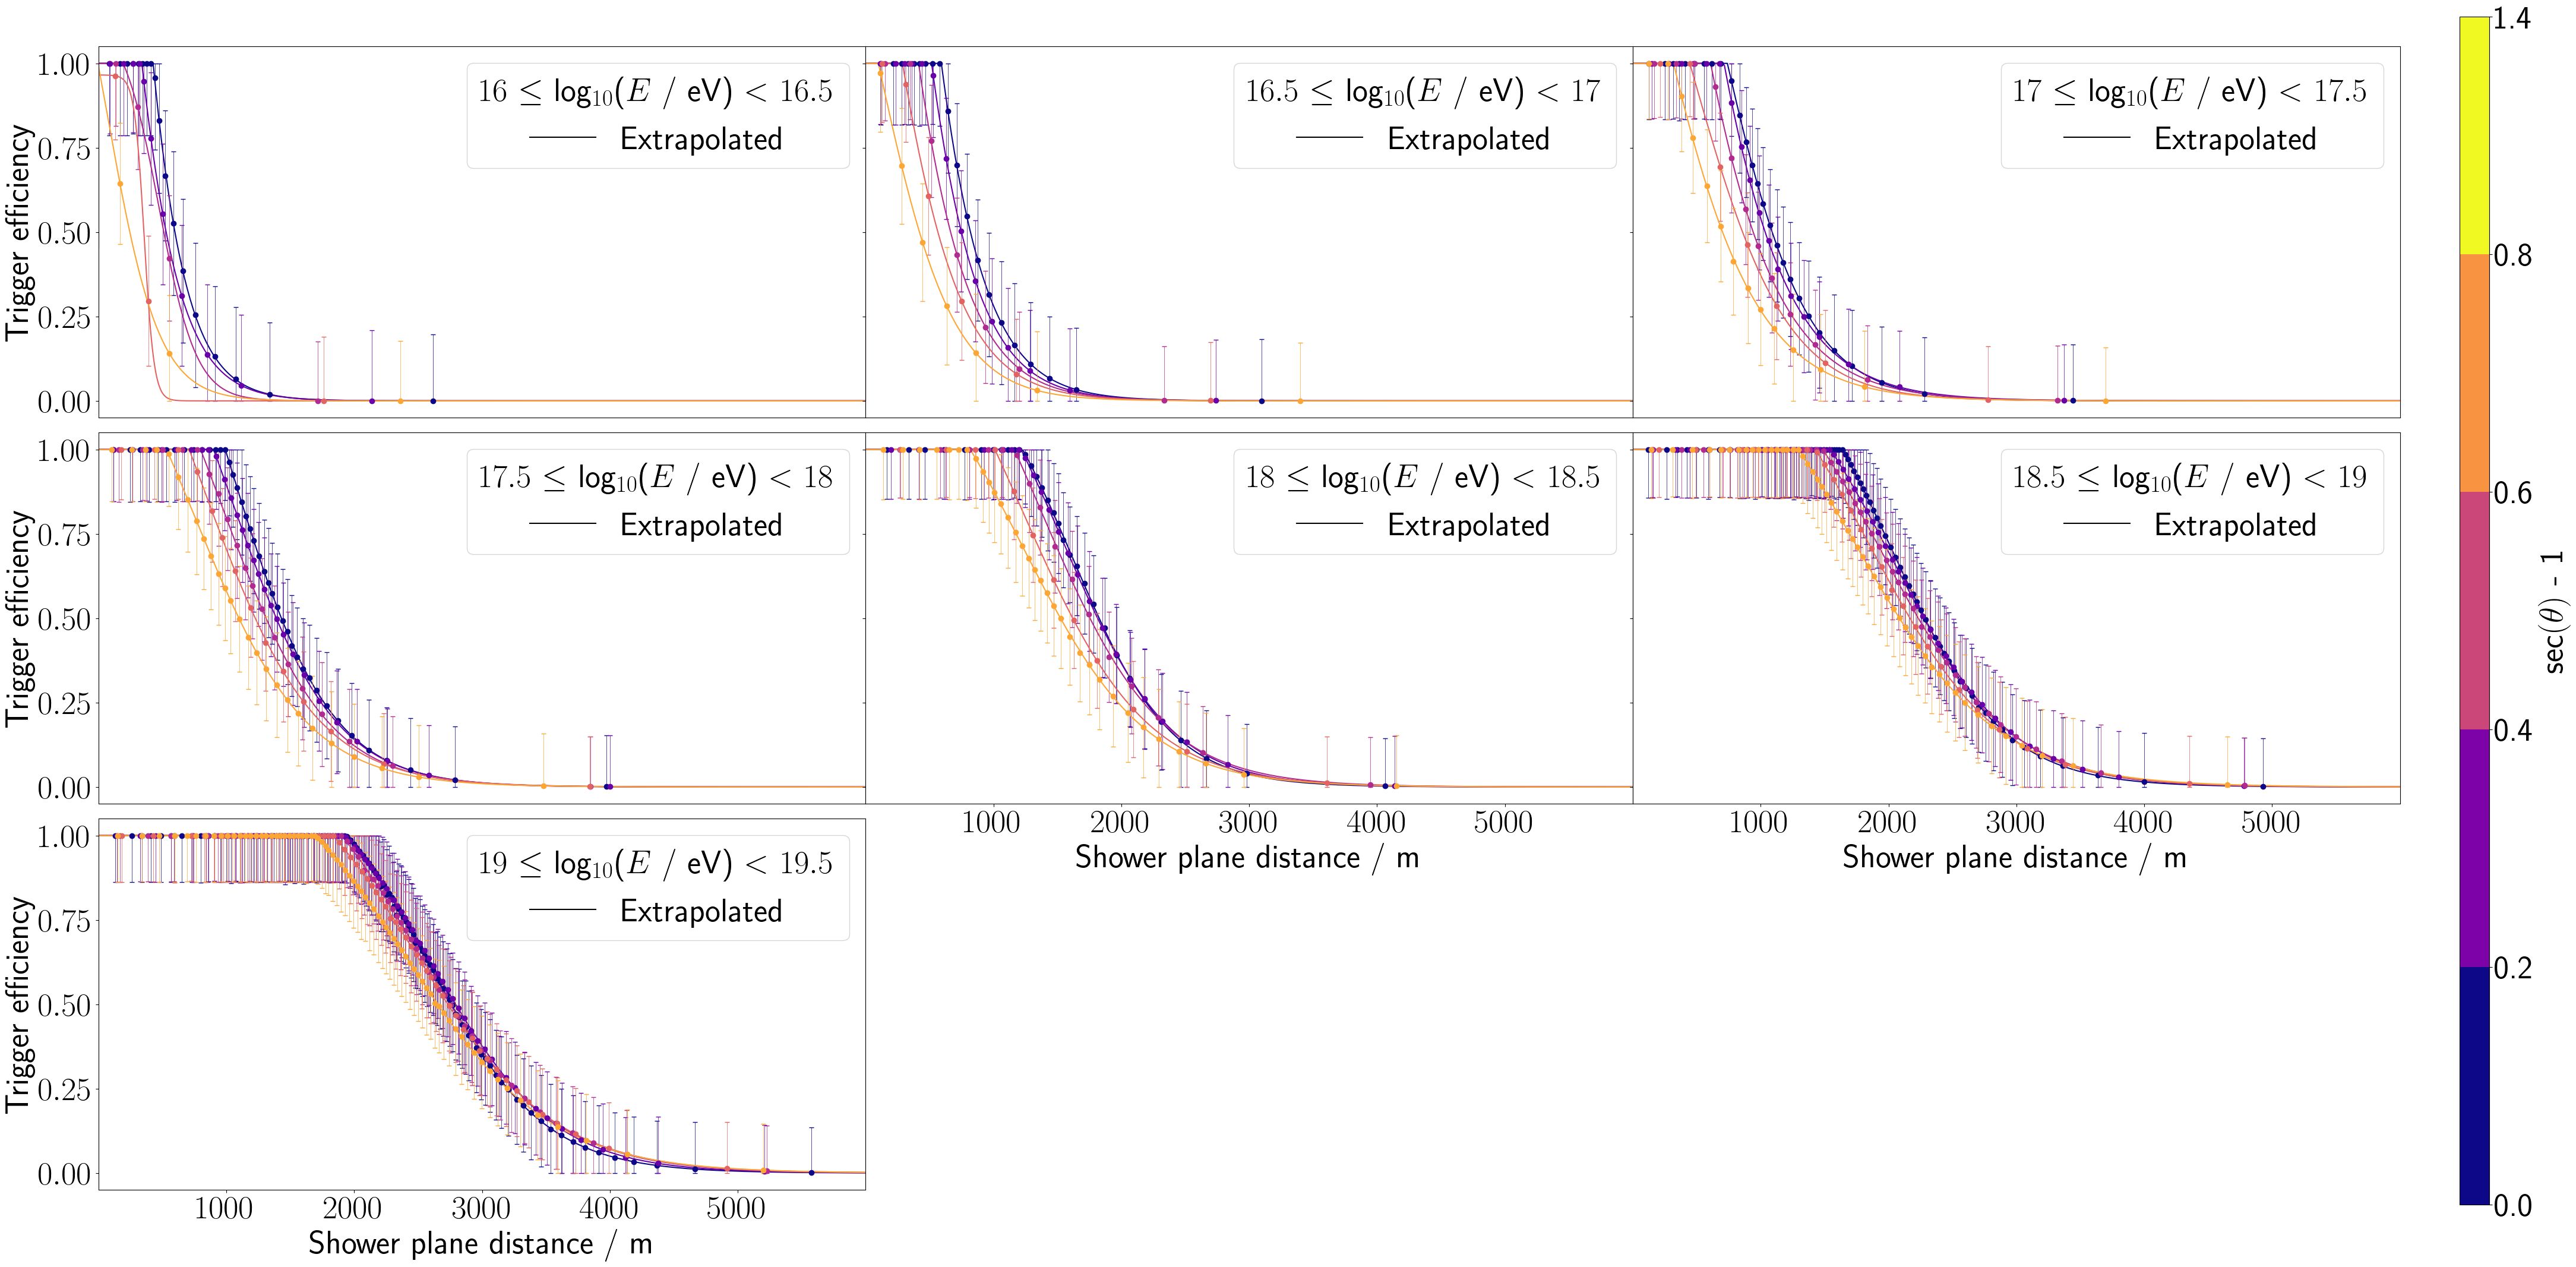

In [2]:
E = Ensemble("120_TwoLayer_Downsampled_AllEnergies_NoCuts", supress_print = True)
Model = E.get_best_model("validation_data")

Model.spd_energy_efficiency("validation_data")

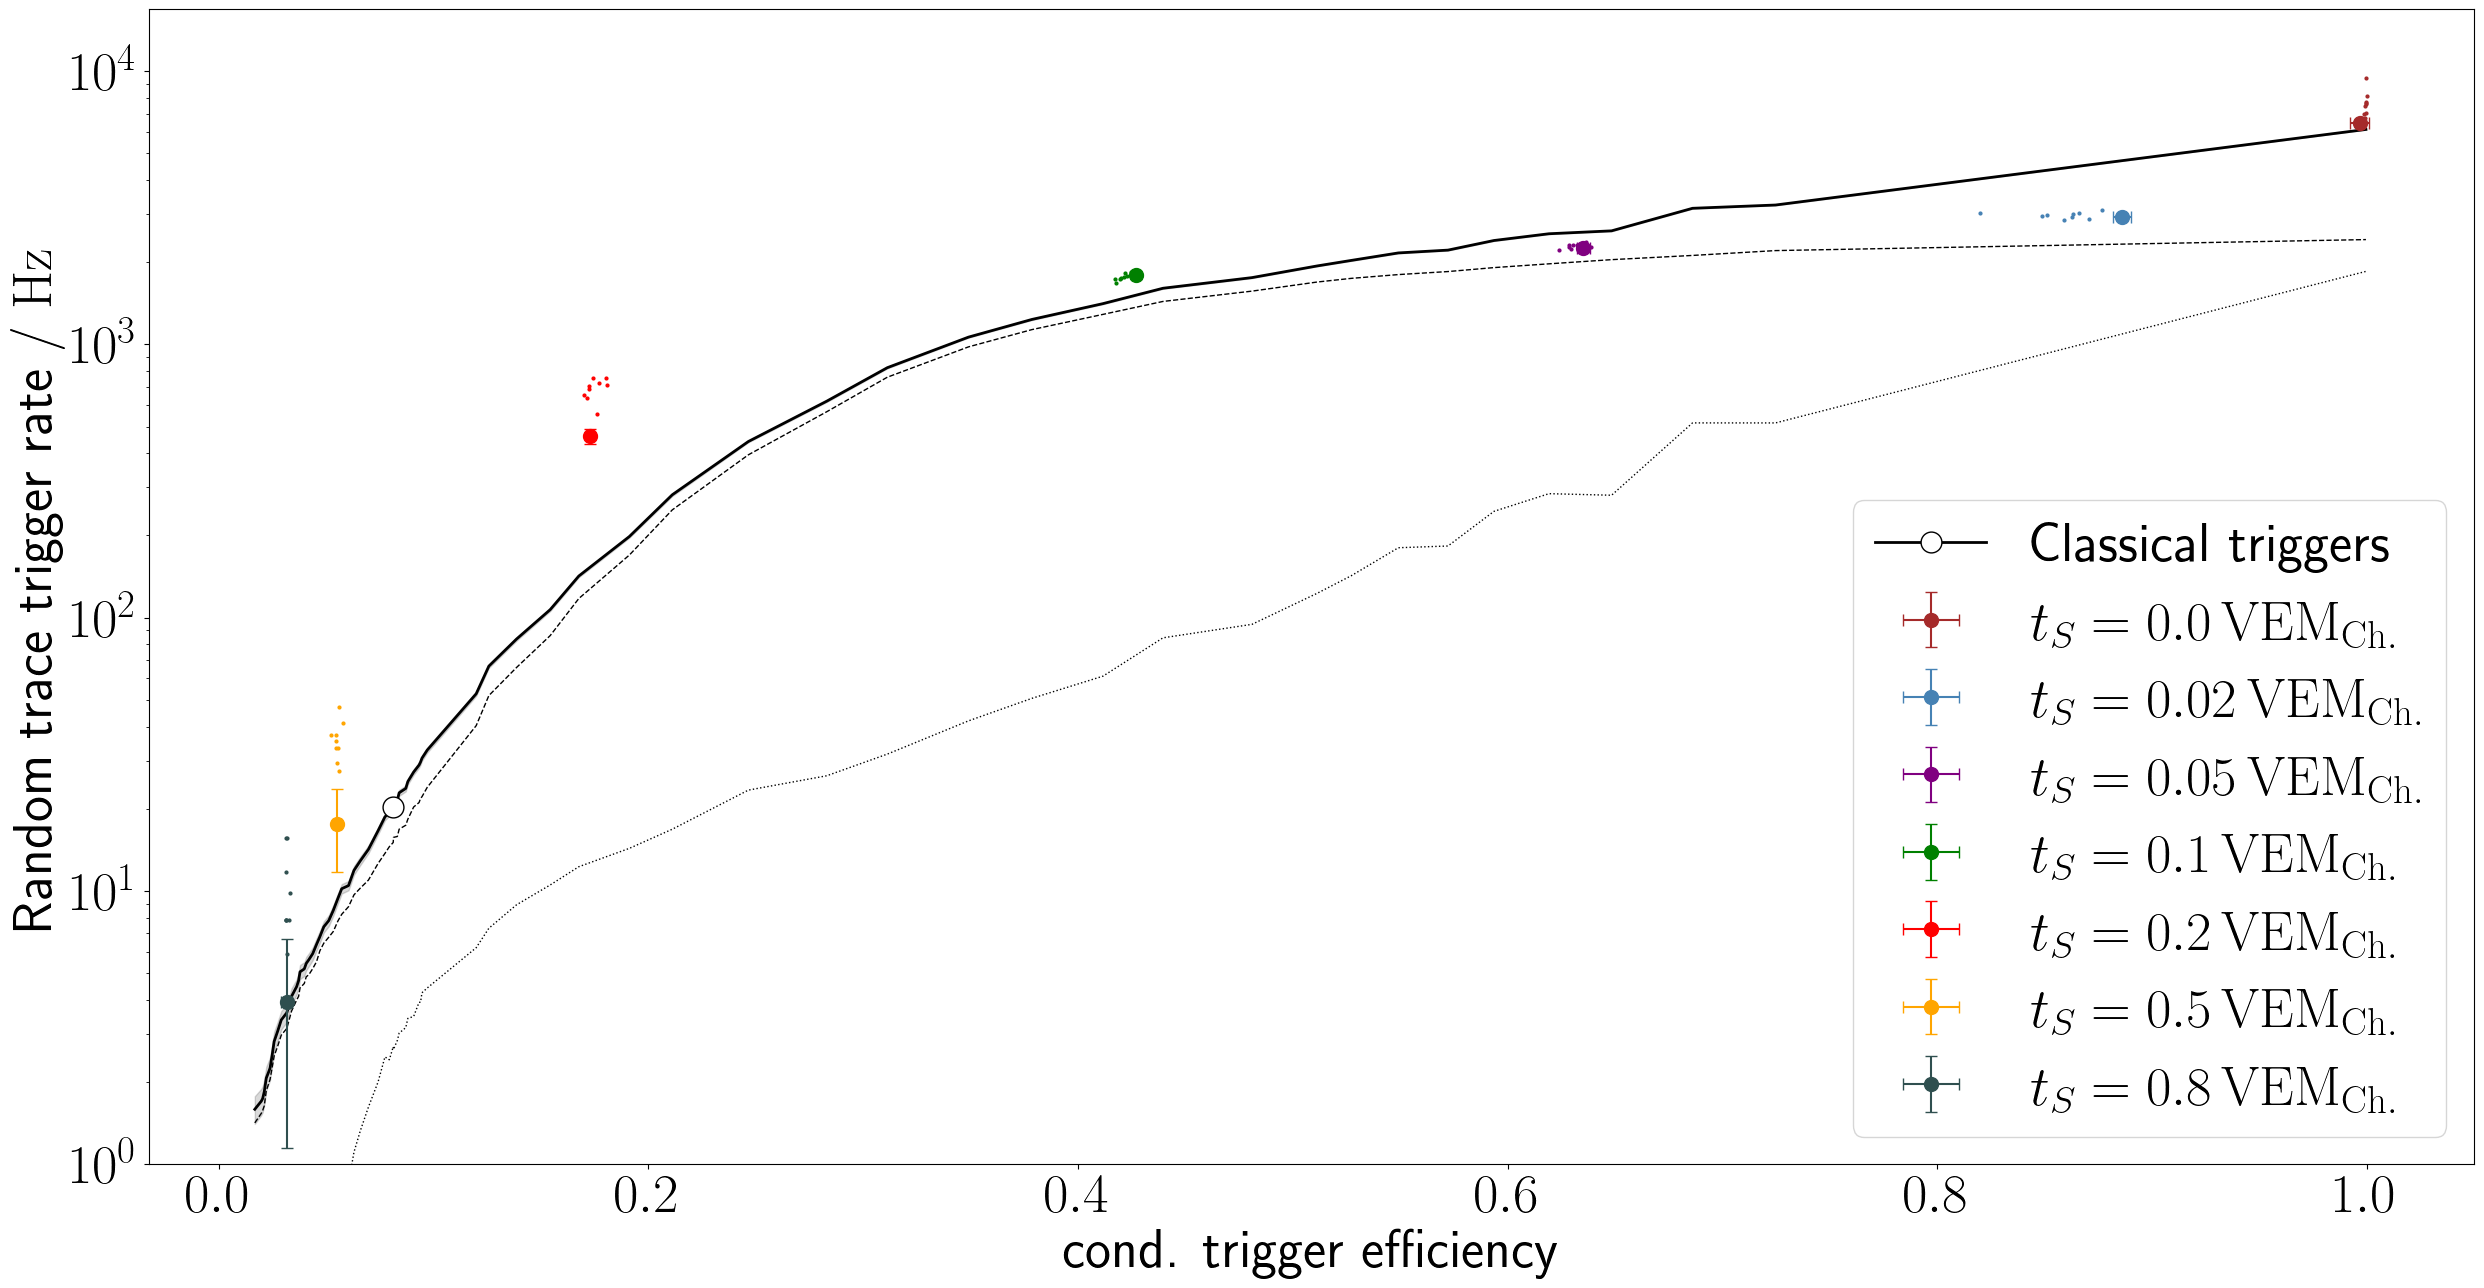

In [6]:
Plot = MoneyPlot("")

c = ["steelblue", "purple", "green", "red", "orange", "darkslategray"]
l = [0.02, 0.05, 0.1, 0.2, 0.5, 0.8]

Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data", color = "brown", label = f"$t_S = 0.0\,\mathrm{{VEM}}_{{\mathrm{{Ch.}}}}$")
for i, i_charge in enumerate(["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]):
    Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_charge}VEM", "validation_data_no_cuts", color = c[i], label = f"$t_S = {l[i]}\,\mathrm{{VEM}}_{{\mathrm{{Ch.}}}}$")

Plot()

Text(0, 0.5, 'TPR')

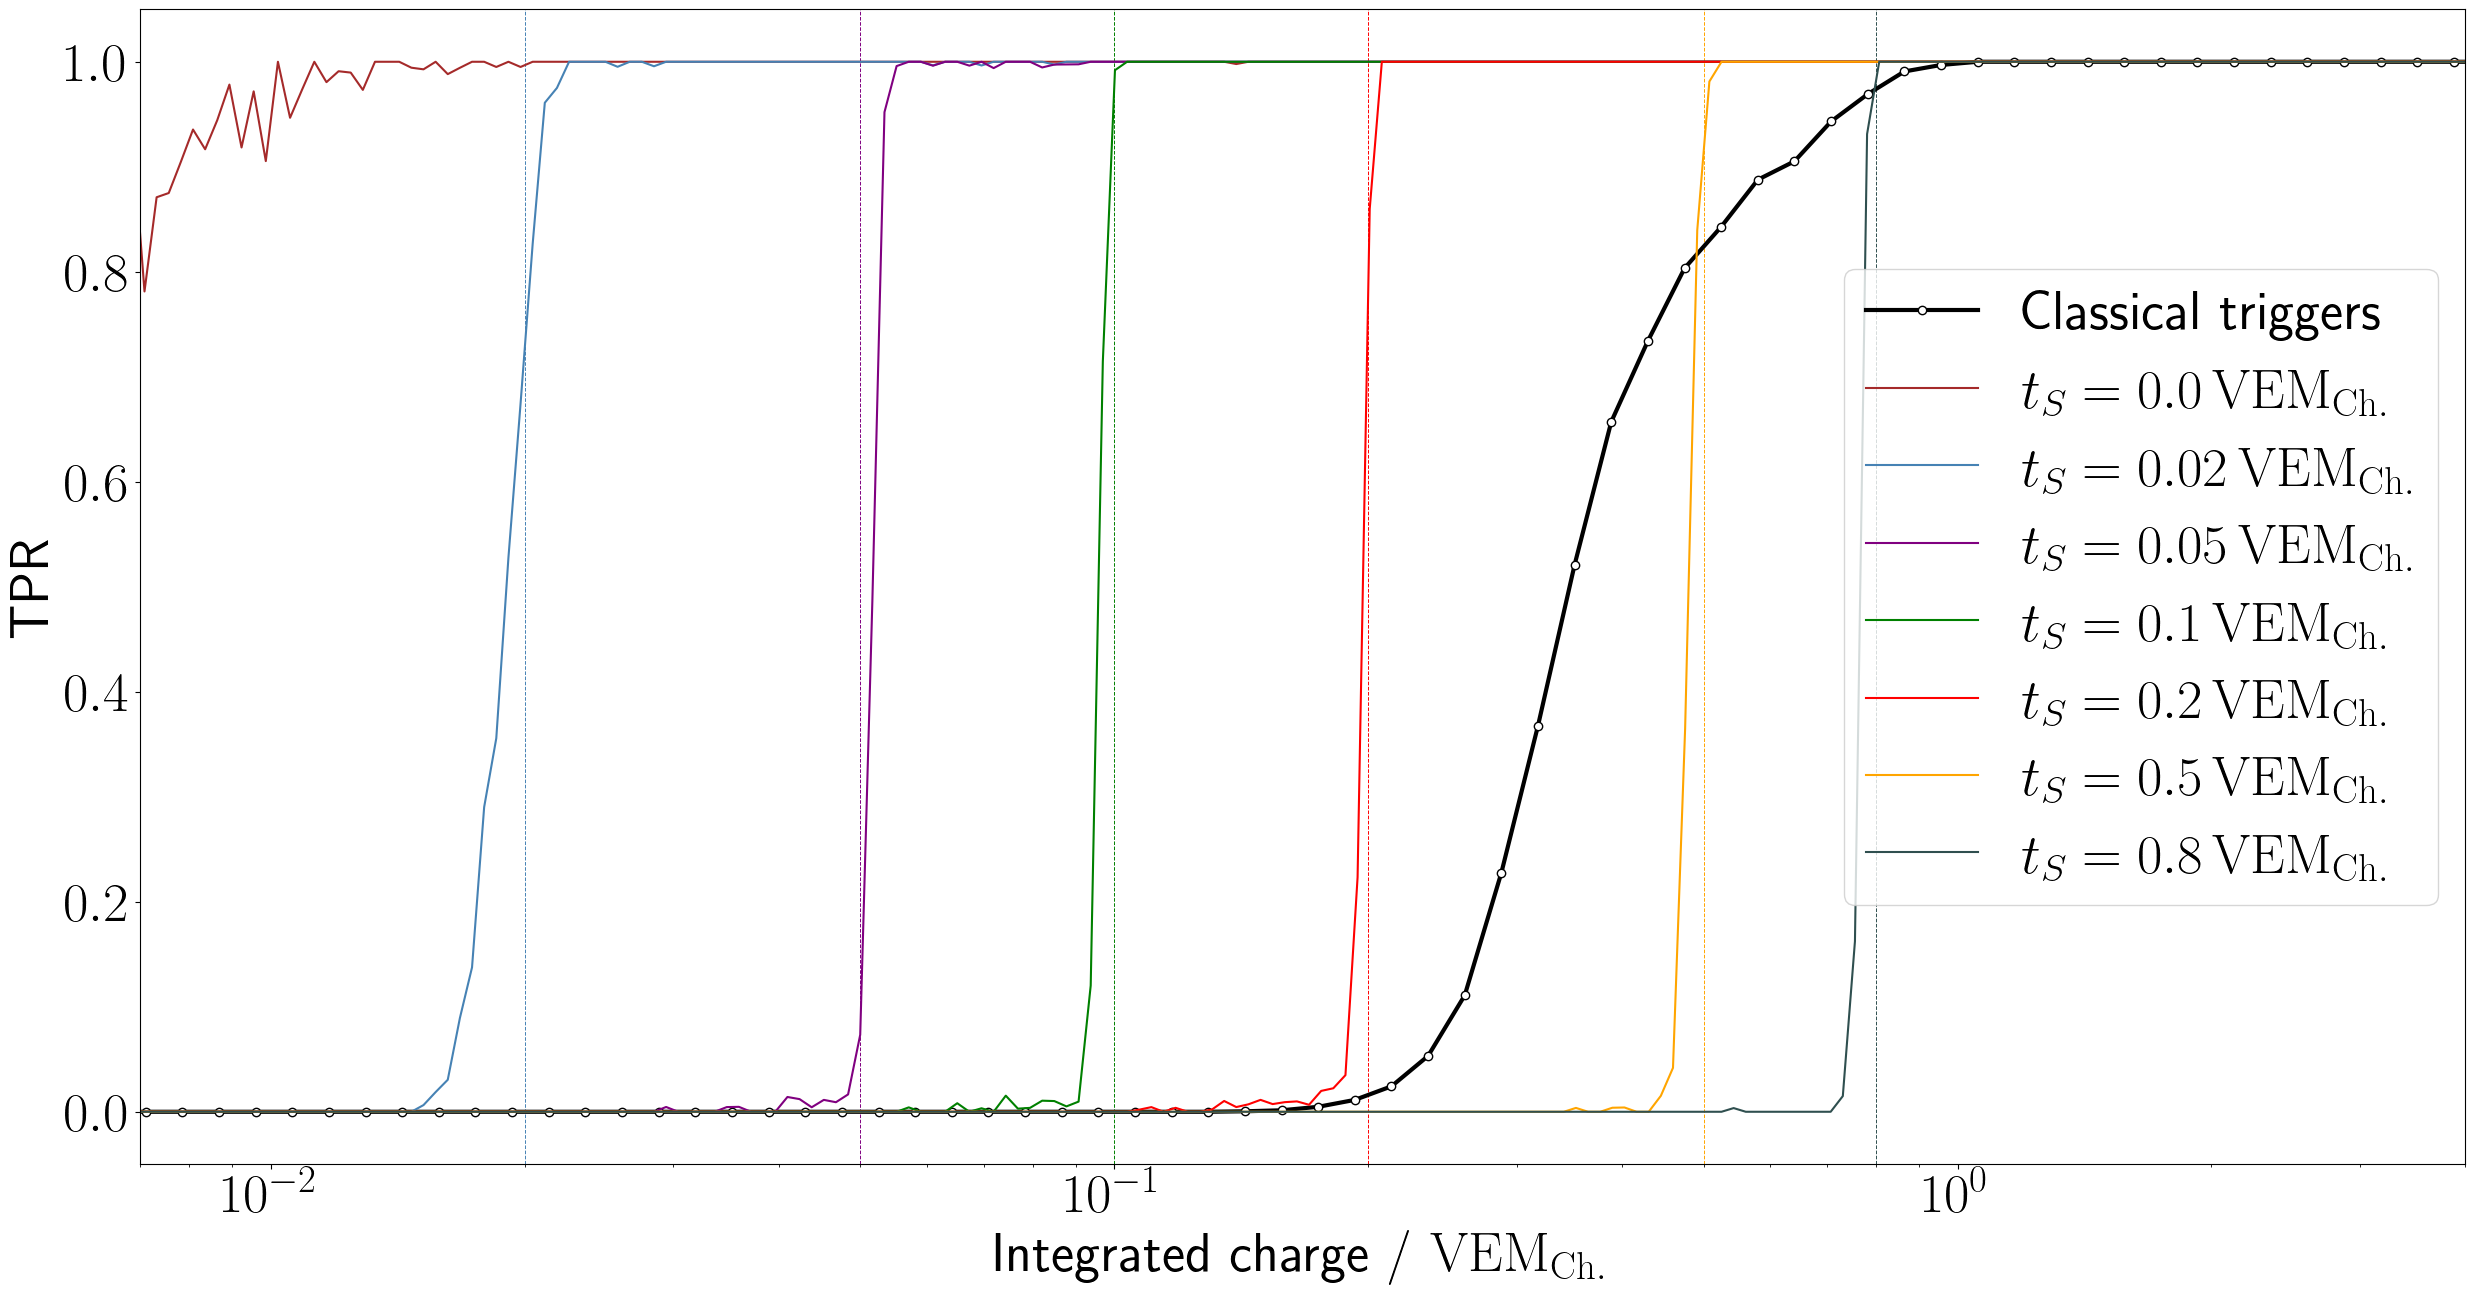

In [5]:
Trigger = HardwareClassifier()
Trigger.signal_efficiency("final_all_triggers", c = "k", lw = 3, label = "Classical triggers", mfc = "w", fmt = "-o")
c = ["brown", "steelblue", "purple", "green", "red", "orange", "darkslategray"]
l = ["0.0", "0.02", "0.05", "0.1", "0.2", "0.5", "0.8"]

for i, i_ch in enumerate(["NoCuts", "0_2VEM", "0_5VEM", "1_0VEM", "2_0VEM", "5_0VEM", "8_0VEM"]):
    save_model = "validation_data_no_cuts" if i_ch != "NoCuts" else "validation_data"
    Models = Ensemble(f"120_TwoLayer_Downsampled_AllEnergies_{i_ch}", supress_print = True)
    BestModel = Models.get_best_model(save_model)
    BestModel.signal_efficiency(save_model, label = f"$t_S = {l[i]}\,\mathrm{{VEM}}_{{\mathrm{{Ch.}}}}$", n_bins = 300, c = c[i])

for i, x in enumerate([0.2, 0.5, 1.0, 2.0, 5.0, 8.0], 1):
    plt.axvline(x/10, ls = "--", lw = 0.7, c = c[i])

# plt.text(0.5, 0.5, "Preliminary", rotation = 20, transform = plt.gca().transAxes, color = "red", fontsize = 100, 
#          verticalalignment = "center",
#          horizontalalignment = "center")

plt.xlim(7e-3, 4)
plt.xscale("log")
plt.legend()
plt.xlabel("Integrated charge / $\mathrm{VEM}_\mathrm{Ch.}$")
plt.ylabel("TPR")

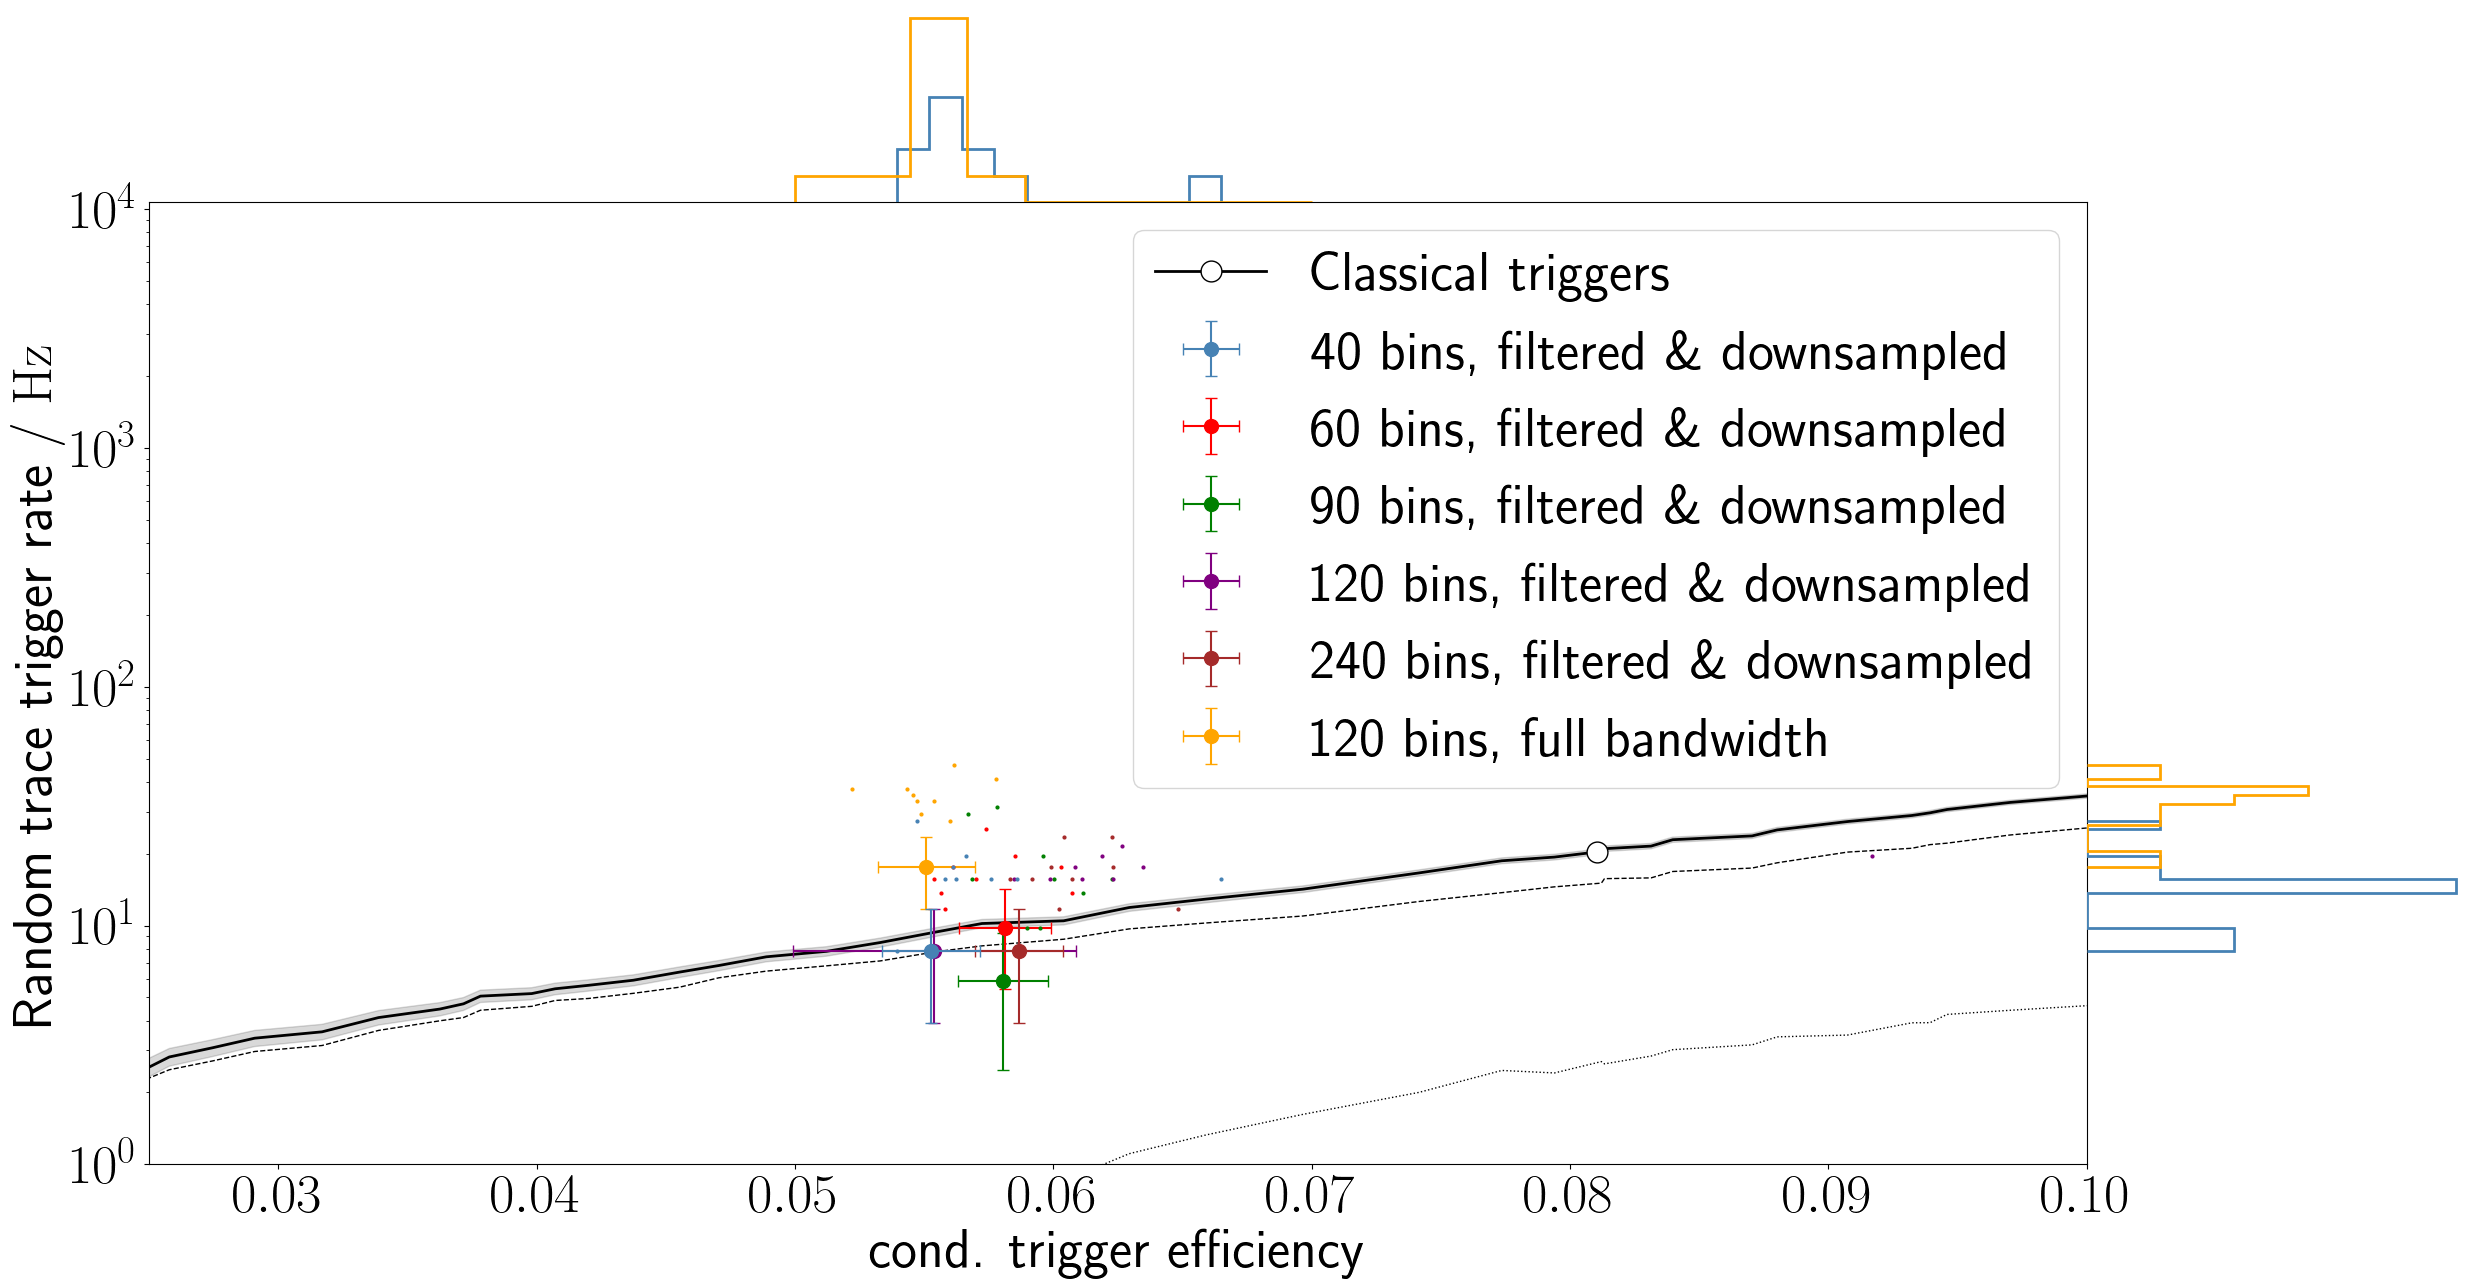

In [28]:
from Binaries import *

ax1 = plt.subplot2grid((6, 6), (1, 0), rowspan = 5, colspan = 5)
ax2 = plt.subplot2grid((6, 6), (0, 0), colspan = 5, sharex = ax1)
ax3 = plt.subplot2grid((6, 6), (1, 5), rowspan = 5, sharey = ax1)

Plot = MoneyPlot("", axis = ax1)

Plot.add("40_eCNN_Downsampled_AllEnergies_5_0VEM", "validation_data_no_cuts", color = "steelblue", label = "40 bins, filtered \& downsampled", zorder = 100)

Plot.add("60_eCNN_Downsampled_AllEnergies_5_0VEM", "validation_data_no_cuts", color = "red", label = "60 bins, filtered \& downsampled")
Plot.add("90_eCNN_Downsampled_AllEnergies_5_0VEM", "validation_data_no_cuts", color = "green", label = "90 bins, filtered \& downsampled")
Plot.add("120_eCNN_Downsampled_AllEnergies_5_0VEM", "validation_data_no_cuts", color = "purple", label = "120 bins, filtered \& downsampled")
Plot.add("240_eCNN_Downsampled_AllEnergies_5_0VEM", "validation_data_no_cuts", color = "brown", label = "240 bins, filtered \& downsampled")
Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_5_0VEM", "validation_data_no_cuts", color = "orange", label = "120 bins, full bandwidth")

bins = np.linspace(0.05, 0.07, 10)

color = "steelblue"
rate, true_eff = np.loadtxt("/cr/users/filip/MoneyPlot/data/40_eCNN_Downsampled_AllEnergies_5_0VEM/validation_data_no_cuts.csv", usecols = [2, 4], unpack = True)
ax2.hist(true_eff, color = color, histtype = "step", lw = 2)
ax3.hist(rate, color = color, histtype = "step", orientation = "horizontal", lw = 2)

color = "orange"
rate, true_eff = np.loadtxt("/cr/users/filip/MoneyPlot/data/120_TwoLayer_FullBandwidth_AllEnergies_5_0VEM/validation_data_no_cuts.csv", usecols = [2, 4], unpack = True)
ax2.hist(true_eff, color = color, histtype = "step", lw = 2, bins = bins)
ax3.hist(rate, color = color, histtype = "step", orientation = "horizontal", lw = 2)

# color = "red"
# rate, true_eff = np.loadtxt("/cr/users/filip/MoneyPlot/data/60_eCNN_Downsampled_AllEnergies_5_0VEM/validation_data_no_cuts.csv", usecols = [2, 4], unpack = True)
# ax2.hist(true_eff, color = color, histtype = "step", lw = 2, bins = bins)
# ax3.hist(rate, color = color, histtype = "step", orientation = "horizontal", lw = 2)

# color = "green"
# rate, true_eff = np.loadtxt("/cr/users/filip/MoneyPlot/data/90_eCNN_Downsampled_AllEnergies_5_0VEM/validation_data_no_cuts.csv", usecols = [2, 4], unpack = True)
# ax2.hist(true_eff, color = color, histtype = "step", lw = 2, bins = bins)
# ax3.hist(rate, color = color, histtype = "step", orientation = "horizontal", lw = 2)

# color = "purple"
# rate, true_eff = np.loadtxt("/cr/users/filip/MoneyPlot/data/120_eCNN_Downsampled_AllEnergies_5_0VEM/validation_data_no_cuts.csv", usecols = [2, 4], unpack = True)
# ax2.hist(true_eff, color = color, histtype = "step", lw = 2, bins = bins)
# ax3.hist(rate, color = color, histtype = "step", orientation = "horizontal", lw = 2)

# color = "brown"
# rate, true_eff = np.loadtxt("/cr/users/filip/MoneyPlot/data/240_eCNN_Downsampled_AllEnergies_5_0VEM/validation_data_no_cuts.csv", usecols = [2, 4], unpack = True)
# ax2.hist(true_eff, color = color, histtype = "step", lw = 2, bins = bins)
# ax3.hist(rate, color = color, histtype = "step", orientation = "horizontal", lw = 2)

ax2.axis("off")
ax3.axis("off")

# for model in 
# rate, true_eff = 
plt.subplots_adjust(hspace = 0, wspace = 0)
Plot((0.025, 0.1))


In [3]:
Model = NNClassifier("ENSEMBLES/120_LSTM_3L_Downsampled_AllEnergies_5_0VEM/ensemble_03/")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 120, 1)]  0           []                               
                                                                                                  
 lambda (Lambda)                [(None, 120, 1),     0           ['input_1[0][0]']                
                                 (None, 120, 1),                                                  
                                 (None, 120, 1)]                                                  
                                                                                                  
 lstm (LSTM)                    (None, 1)            12          ['lambda[0][0]']                 
                                                                                              

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 120, 1)]  0           []                               
                                                                                                  
 lambda (Lambda)                [(None, 120, 1),     0           ['input_1[0][0]']                
                                 (None, 120, 1),                                                  
                                 (None, 120, 1)]                                                  
                                                                                                  
 lstm (LSTM)                    (None, 1)            12          ['lambda[0][0]']                 
                                                                                              

/cr/users/filip/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


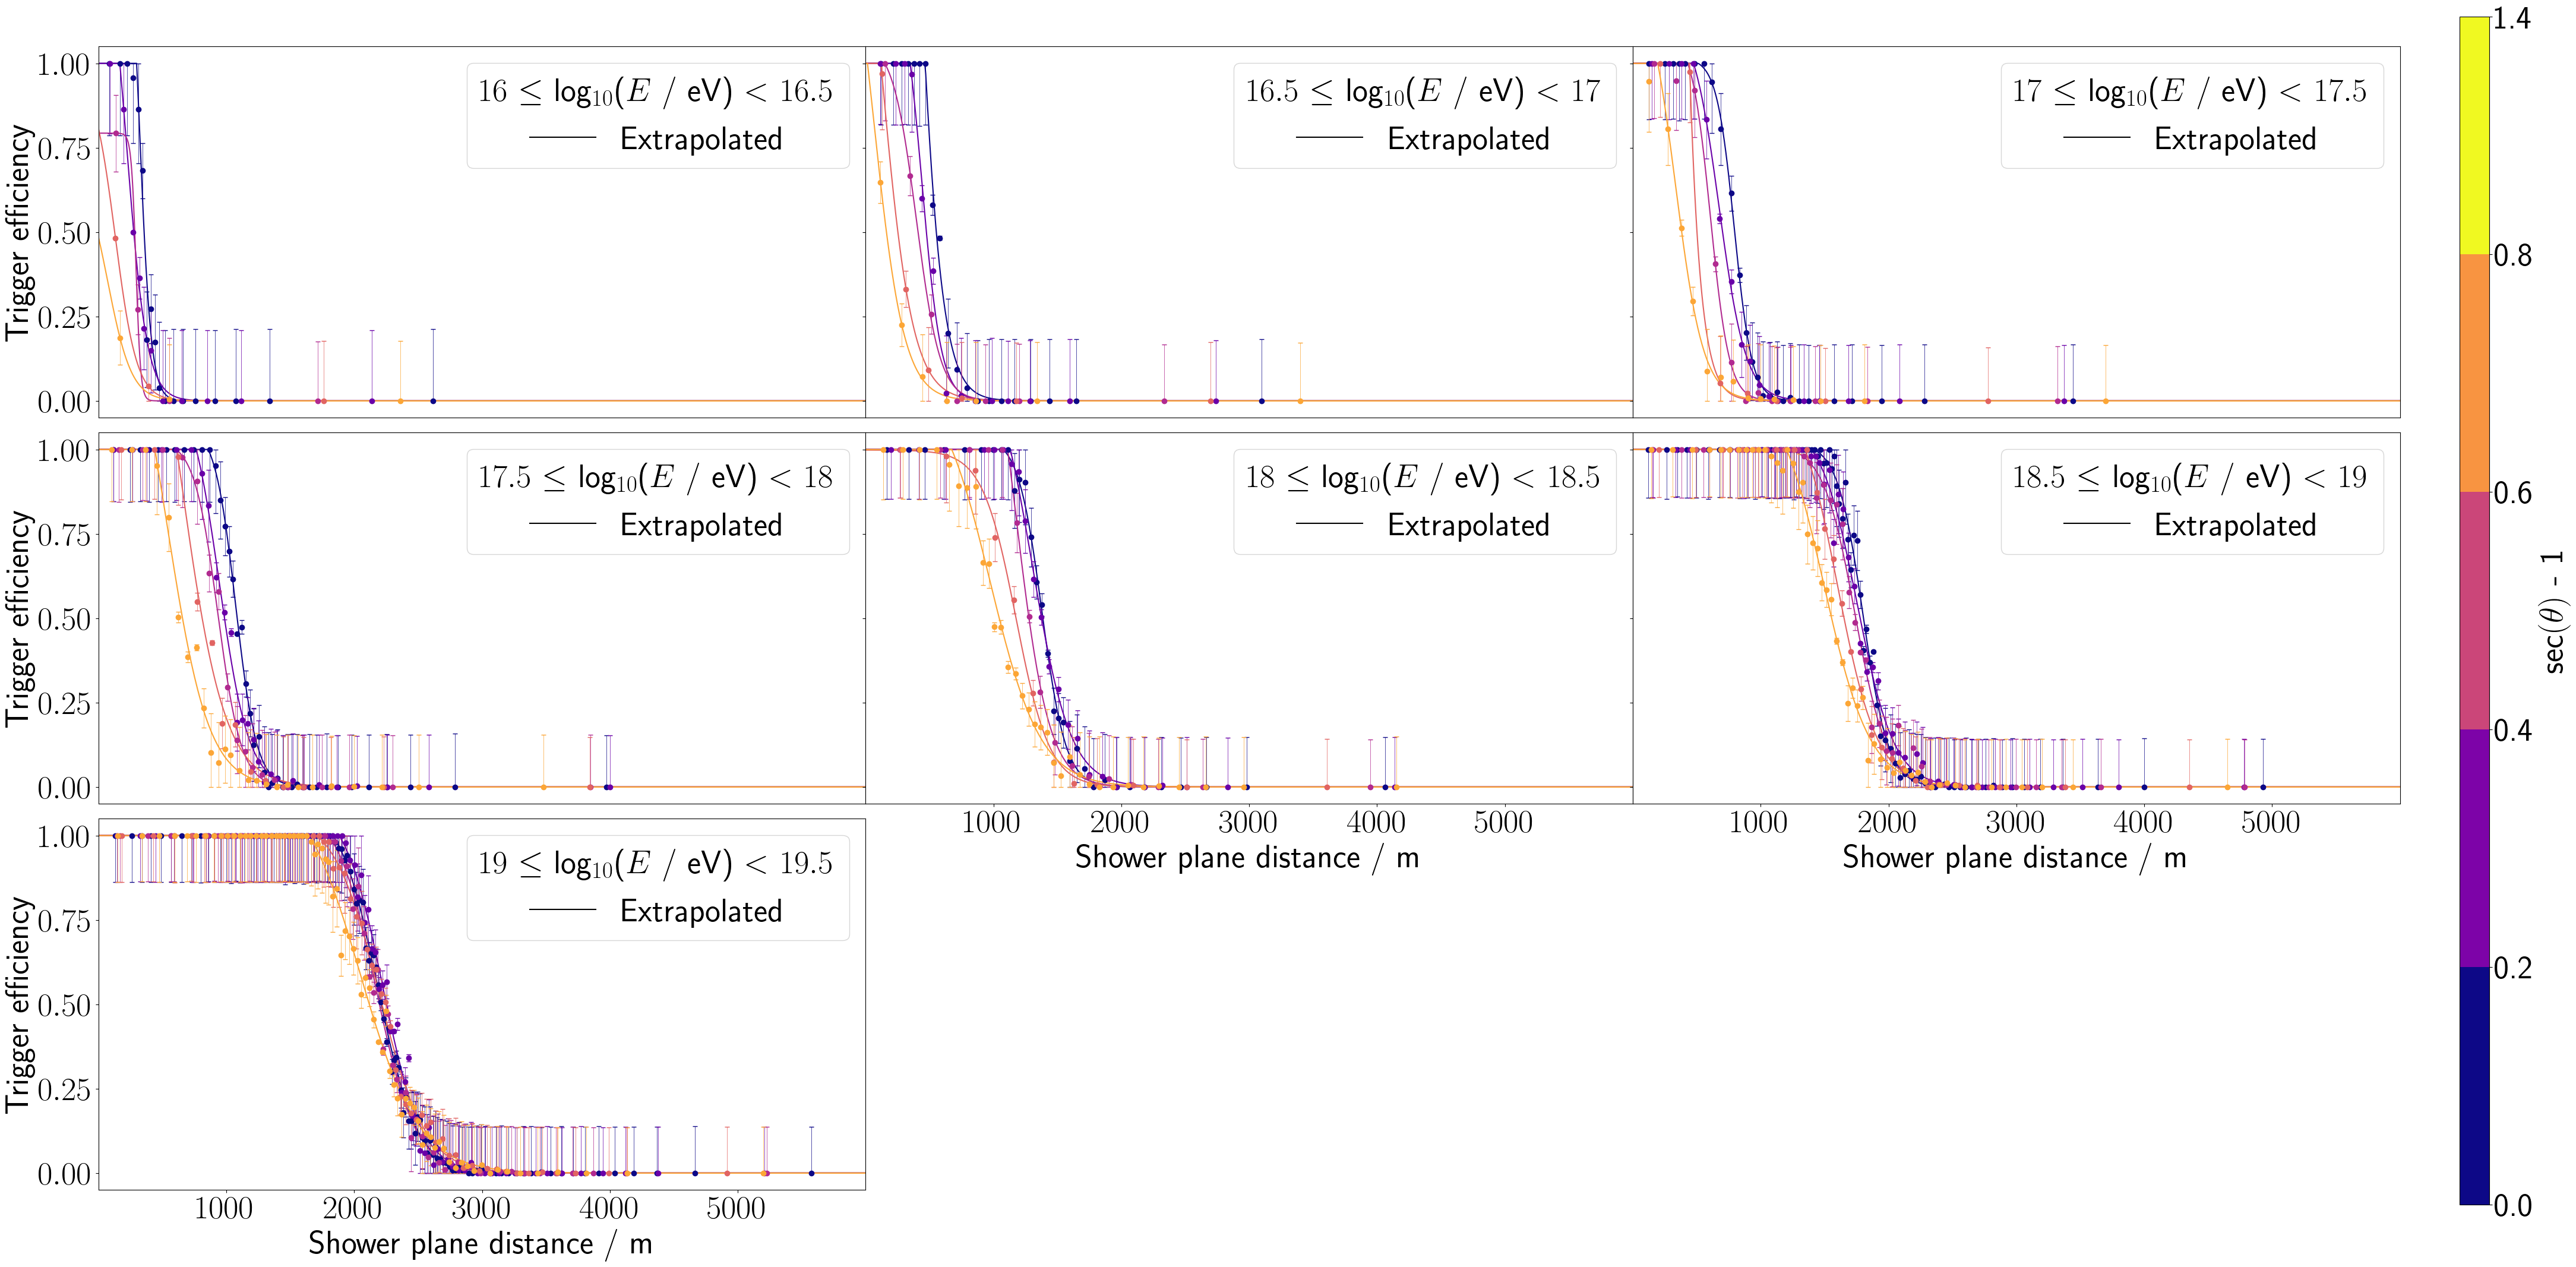

In [3]:
from Binaries import *

Model = NNClassifier("ENSEMBLES/120_LSTM_3L_Downsampled_AllEnergies_5_0VEM/ensemble_03/")

Model.spd_energy_efficiency("final_predictions")